In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [4]:
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation = gold_data.drop(['Date'],axis=1).corr()

<Axes: >

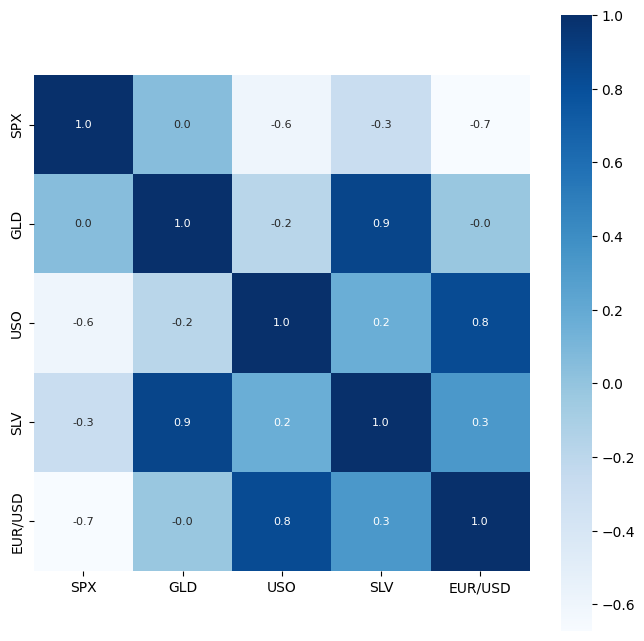

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square=True , fmt= '.1f' , annot=True, annot_kws={'size':8},cmap='Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\niran\AppData\Local\Temp\ipykernel_2104\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

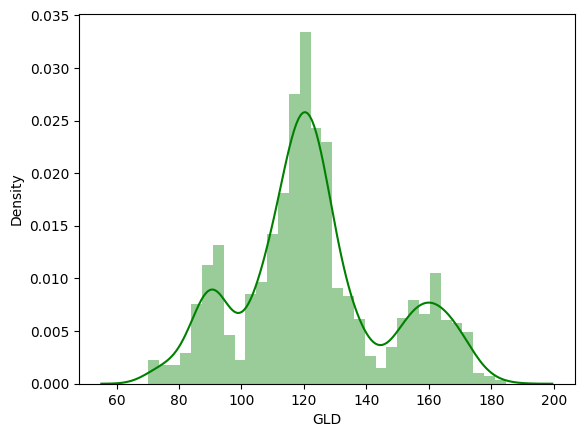

In [16]:
sns.distplot(gold_data['GLD'],color='green')

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [19]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [24]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2, random_state=2)

In [25]:
regressor = RandomForestRegressor( n_estimators=100)

In [26]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
test_data_prediction = regressor.predict(X_test)

In [28]:
test_data_prediction

array([168.57989901,  82.01329994, 115.78880033, 127.69260083,
       120.71560158, 154.76929761, 150.47329862, 125.99390067,
       117.41069868, 125.96370094, 116.62180134, 171.67760054,
       142.11209919, 167.89039855, 115.20140005, 117.73370037,
       138.84920335, 170.0543009 , 158.80970269, 160.40969917,
       155.15280021, 124.93230039, 176.3804995 , 157.6936034 ,
       125.23840032,  93.93889989,  77.7635002 , 120.29740028,
       119.15089949, 167.48570032,  88.07320063, 125.30159992,
        91.29720065, 117.80220024, 121.05639938, 136.6845006 ,
       115.56770135, 115.15820075, 149.17759992, 107.42320065,
       104.41630212,  87.14619794, 126.42830058, 118.03869988,
       153.19379901, 119.55440019, 108.39459983, 107.95129828,
        93.13740058, 127.3156972 ,  74.50160048, 113.59829915,
       121.59290009, 111.33459897, 118.94449865, 120.67809939,
       159.20670113, 167.97430157, 146.80879697,  85.72889849,
        94.38690056,  86.8027989 ,  90.42700032, 119.07

In [29]:
error = metrics.r2_score(Y_test,test_data_prediction)

In [30]:
error

0.9891473133148765

In [31]:
Y_test = list(Y_test)

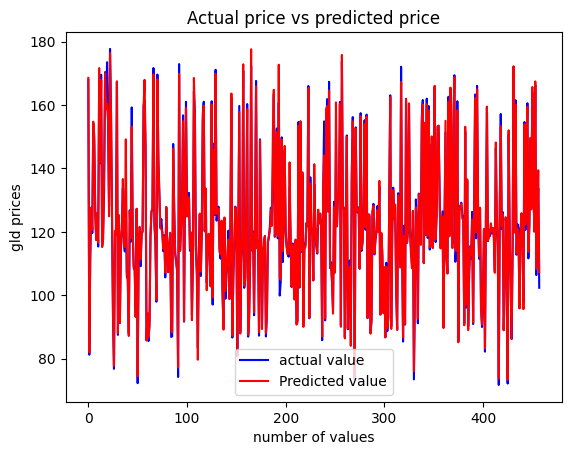

In [36]:
plt.plot(Y_test,color = 'blue',label='actual value')
plt.plot(test_data_prediction,color='red',label='Predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('gld prices')
plt.legend()